In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('wholesale_customers_data.csv')
df_1 = pd.read_csv('data1.csv')
df_2 = pd.read_csv('data2.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,2,3,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,2,3,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,1,3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,2,3,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [5]:
df_2.head()

,Channel_2,Channel_1,Region_3,Region_1,Region_2,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,0,1,0,0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,1,0,1,0,0,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,1,0,1,0,0,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0,1,1,0,0,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,1,0,1,0,0,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [11]:
res, score = [], []
for i in range(2,15):
    km = KMeans(n_clusters=i, n_init= 'auto')
    km.fit_predict(df_2)
    score.append(silhouette_score(df_2, km.labels_, metric='euclidean'))
    res.append(km.inertia_)

In [12]:
score

[0.29105218337898886,
 0.2352089035011324,
 0.17710058129678022,
 0.17784599995651032,
 0.16794695372249563,
 0.17572363477264533,
 0.17082184609822335,
 0.14818766954451487,
 0.14383408312596707,
 0.1330562270384167,
 0.1380856486622967,
 0.1366787553181074,
 0.14868253728468997]

<AxesSubplot: >

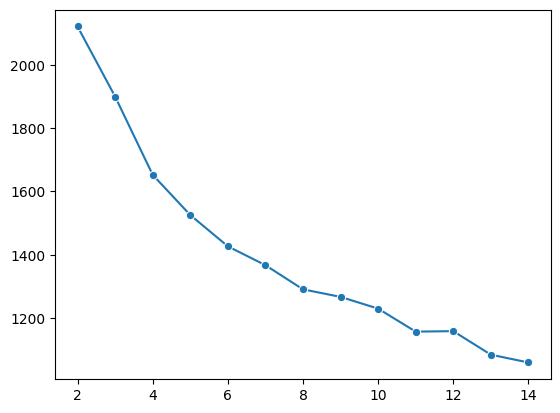

In [16]:
x = [i for i in range(2,15)]
sns.lineplot(x=x, y=res, marker='o')